In [19]:
import tensorflow as tf
import os

from tensorflow import keras
import random
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
from math import floor, ceil, pi
from PIL import Image
import numpy as np 
%matplotlib inline



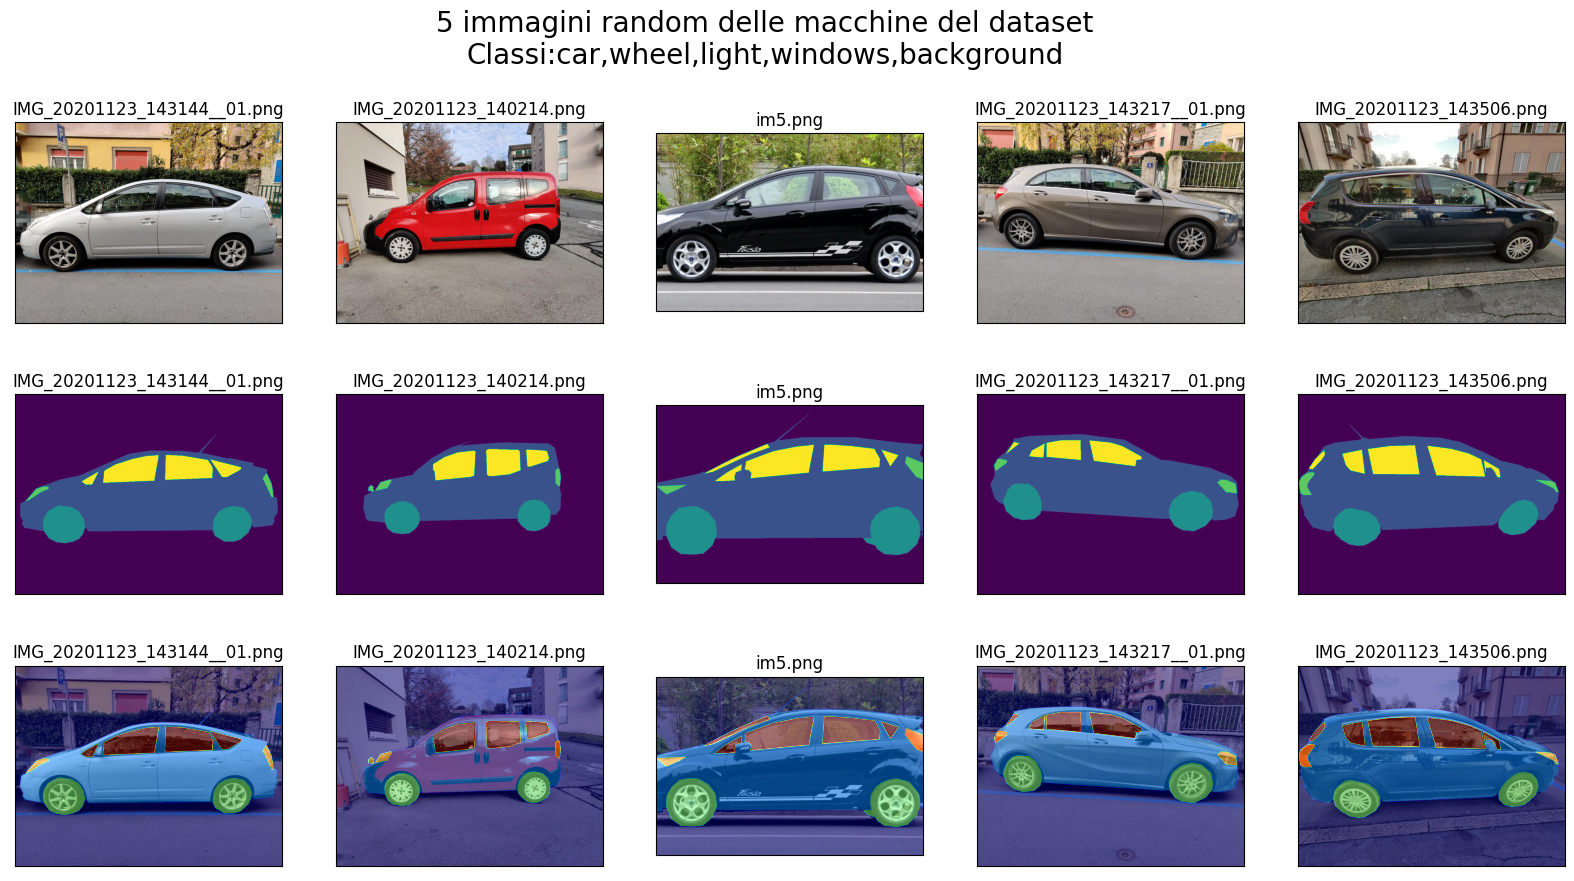

In [20]:
#Get Directory of car-segmentation images
parent = os.path.abspath(os.path.join(os.getcwd(), os.pardir)) #parent directory
img_folder = os.path.join(parent, "original-dataset", "images")
masks_folder = os.path.join(parent, "original-dataset", "masks")

#Print of 5 random images from directory
fig = plt.figure(figsize=(20, 10))#(width,height)
fig.tight_layout()

for i in range(5):
    #1) Mostro L'IMMAGINE
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax = fig.add_subplot(3, 5, i+1)# 3 righe x 5 colonne, attualmente in posizione i+1
    #Imposto il titolo dell'immagine e rimuovo gli assi
    ax.title.set_text(file)
    ax.set_xticks([])
    ax.set_yticks([])
    #Titolo generale del grafo
    plt.suptitle('5 immagini random delle macchine del dataset\nClassi:car,wheel,light,windows,background', fontsize=20)
    plt.imshow(img)
    
    #2) Mostro la MASCHERA
    mask_path = os.path.join(masks_folder,file)
    mask = mpimg.imread(mask_path)
    ax = fig.add_subplot(3, 5, i+6)
    ax.title.set_text(file)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(mask)
    
    #3) Mostro la MASCHERA SOVRAPPOSTA ALL'IMMAGINE DI PARTENZA
    ax = fig.add_subplot(3, 5, i+11)
    ax.title.set_text(file)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(img, cmap='gray')
    plt.imshow(mask, cmap='jet', alpha=0.5)
  

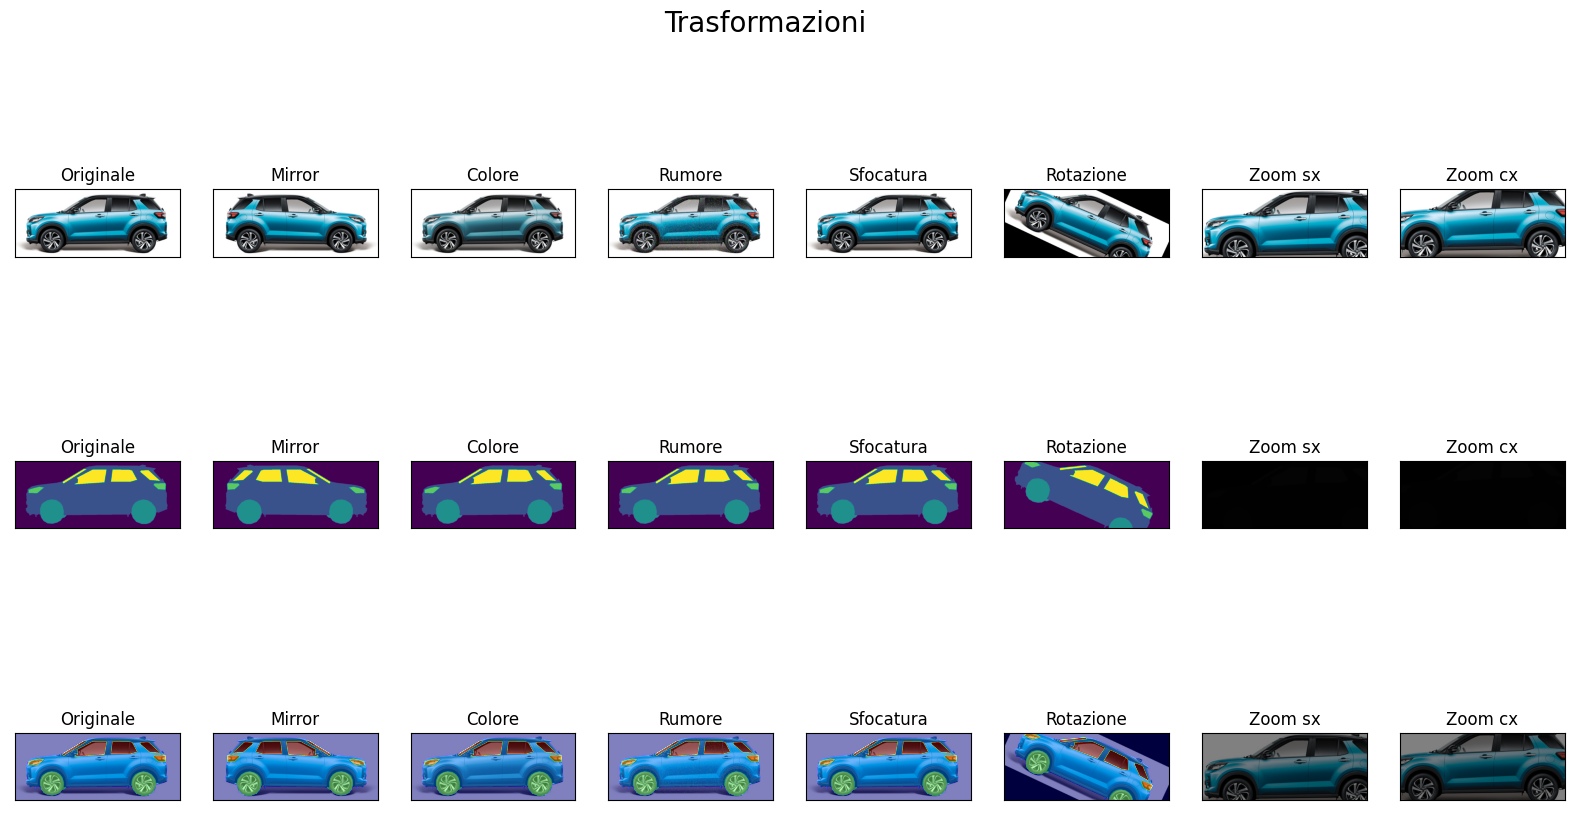

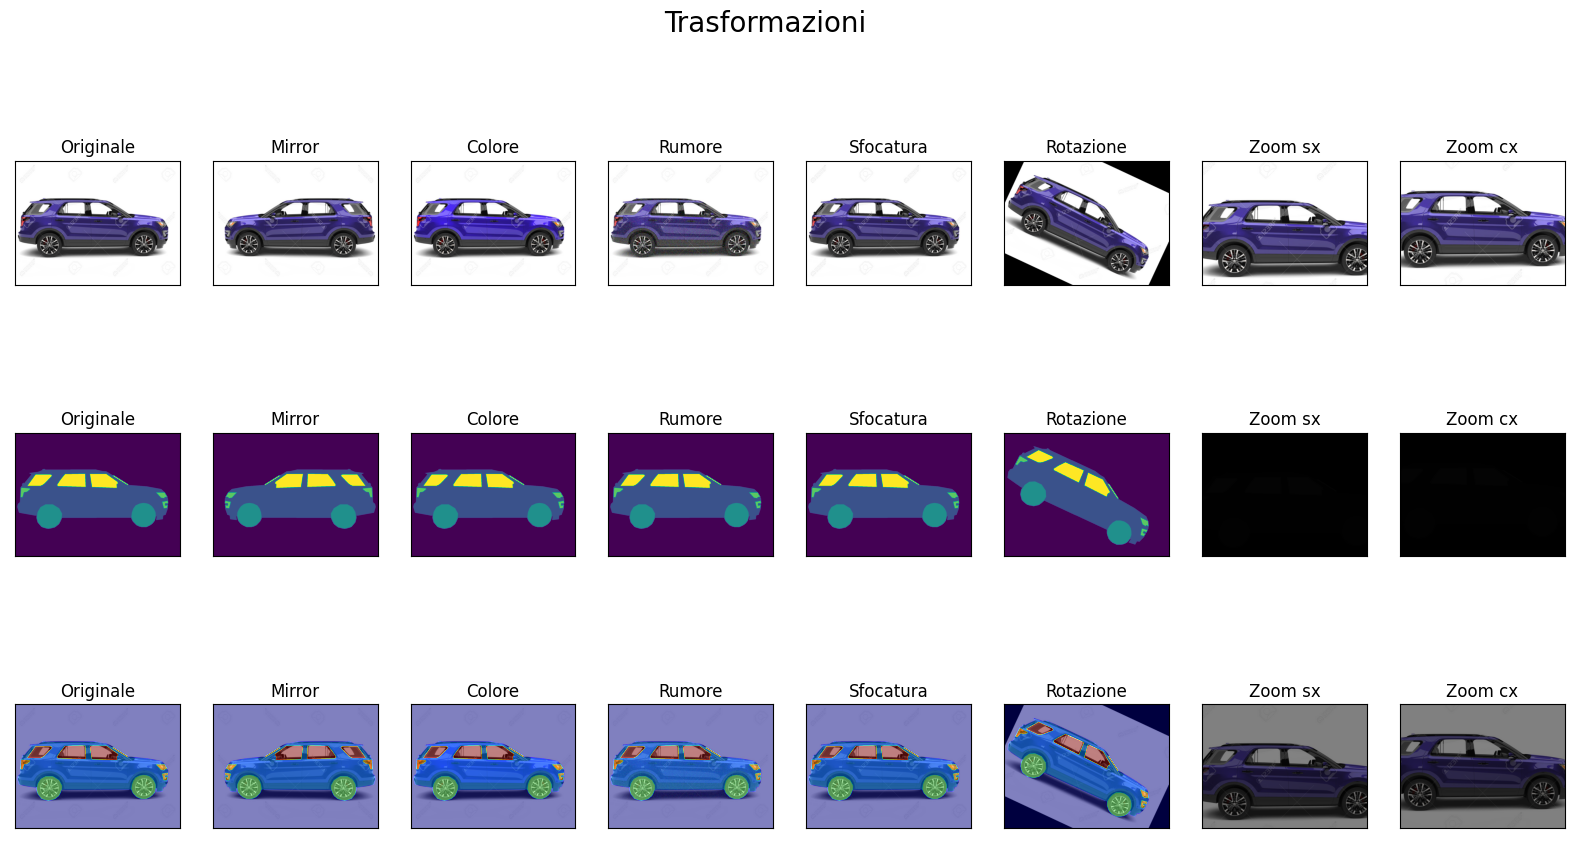

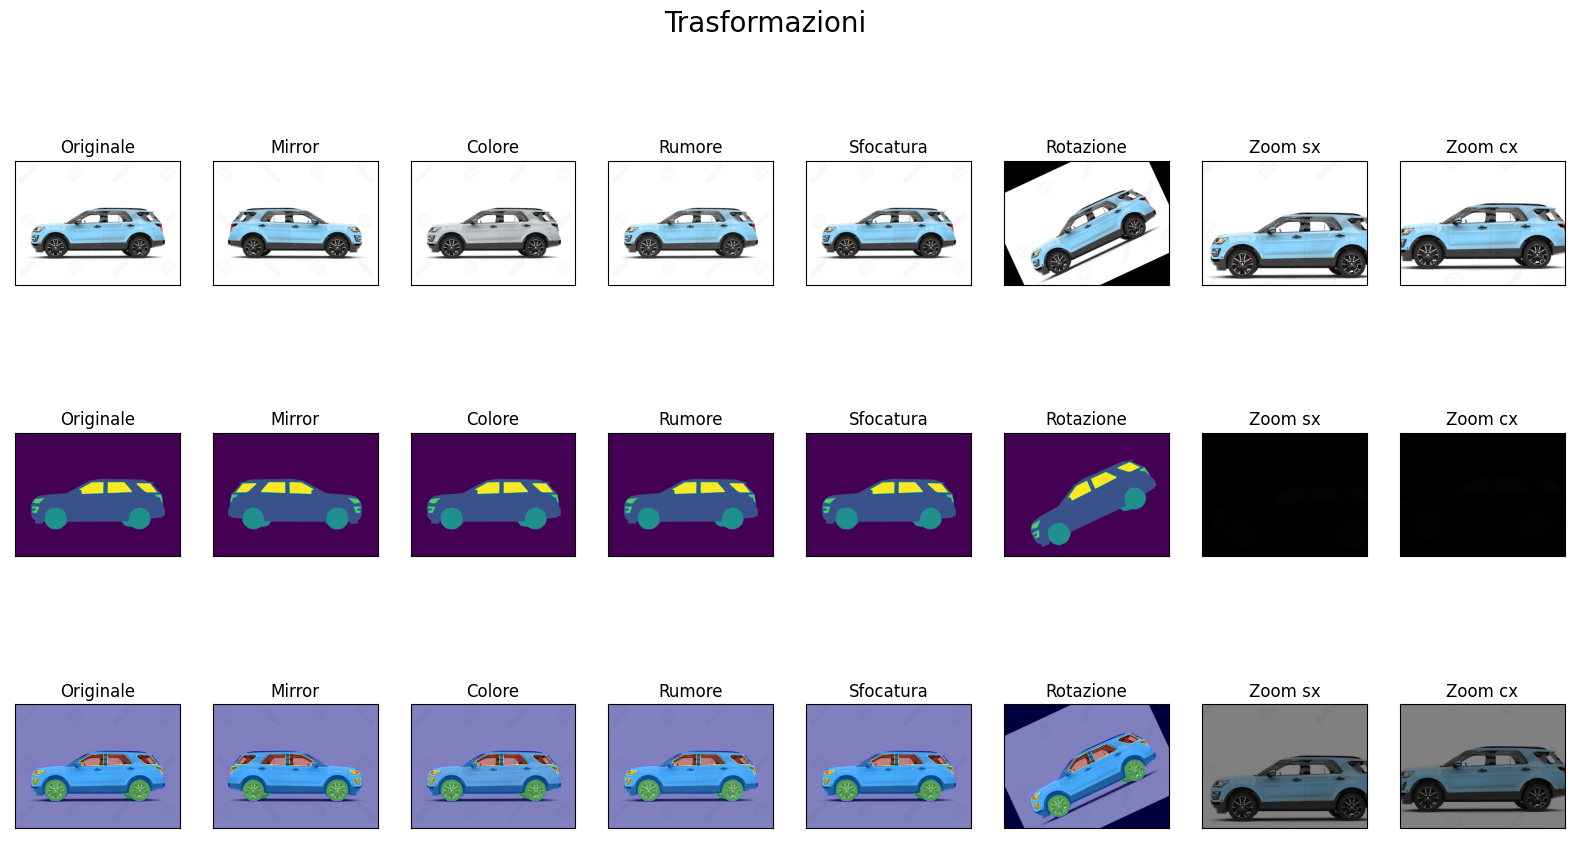

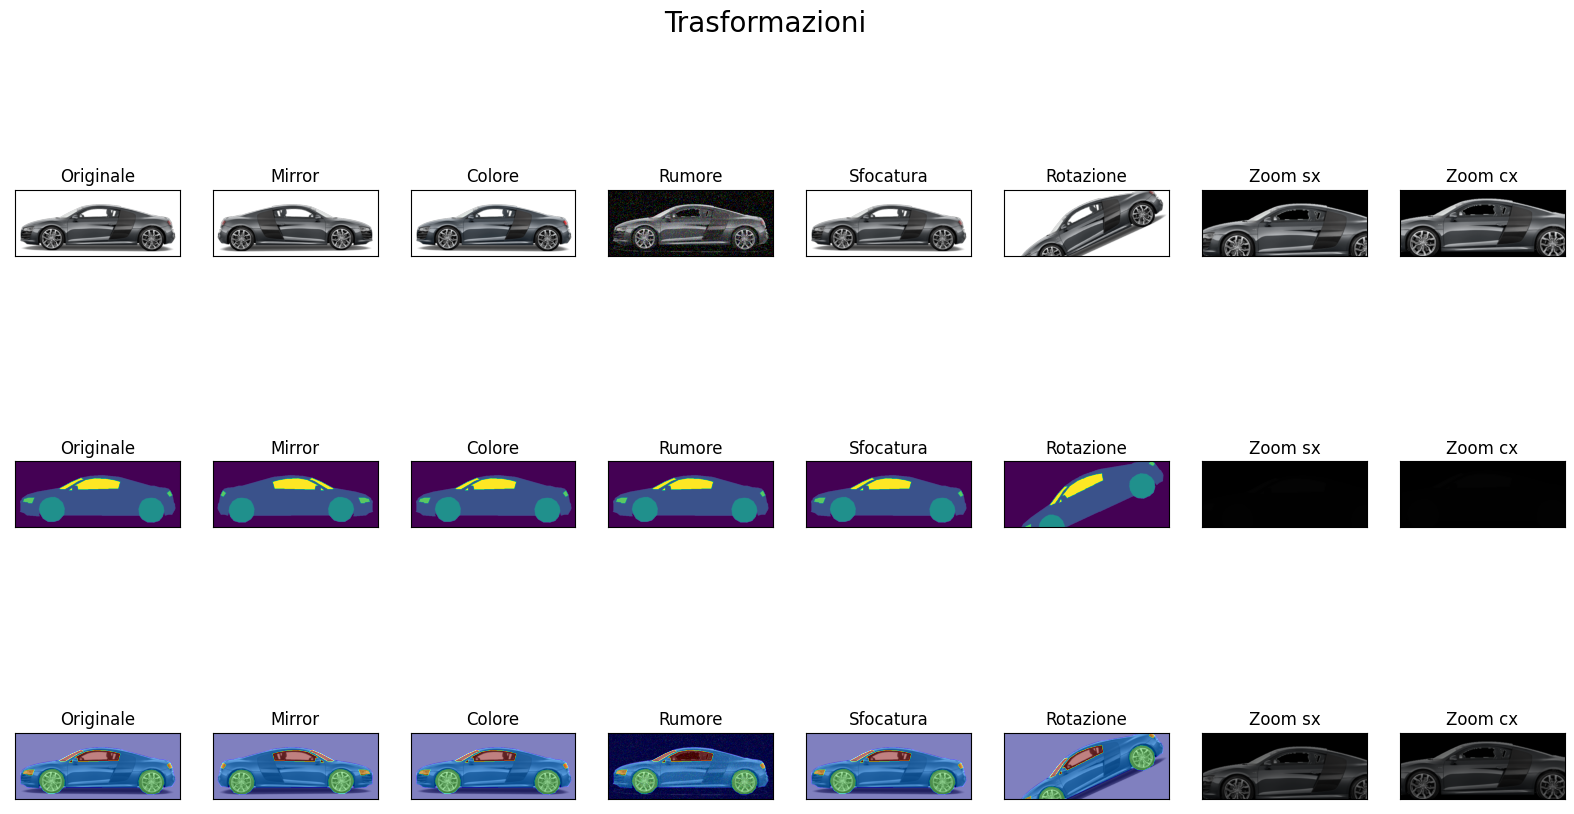

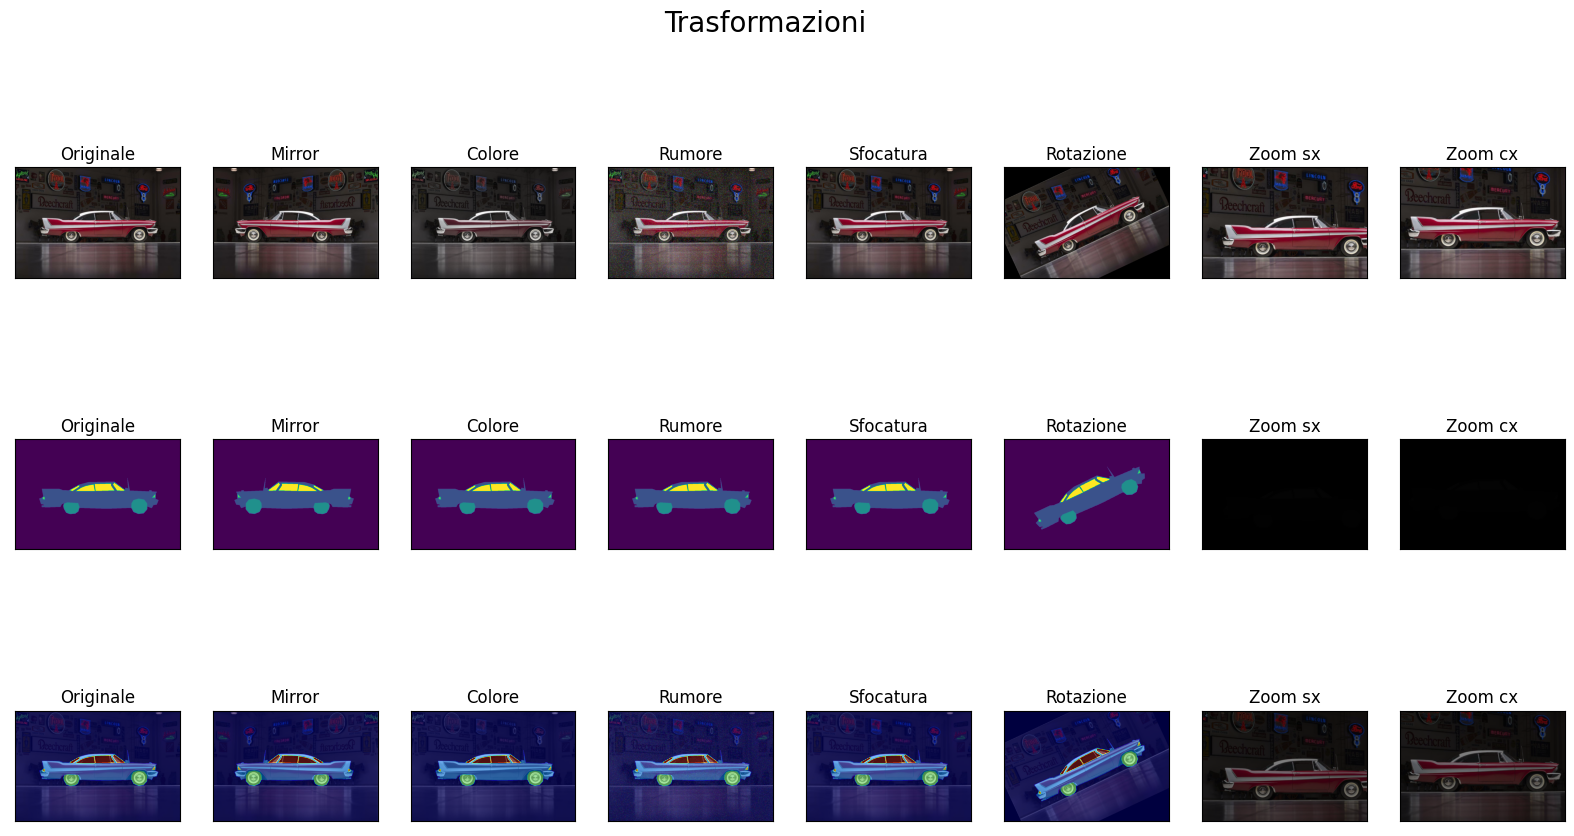

In [22]:
#Directory che contiene le trasformazioni
img_all = os.path.join(parent, "car-segmentation", "images")
masks_all = os.path.join(parent, "car-segmentation", "masks")

#Trasformazioni eseguite
trasformazioni = [['trasl_','Mirror'], ['col_','Colore'],['gauss_','Rumore'],['blur_','Sfocatura'],['rot_','Rotazione'],['zoomL_', 'Zoom sx'],['zoomC_', 'Zoom cx']]

for j in range(5):
    #Visualizza le Trasformazioni eseguite
    fig = plt.figure(figsize=(20, 10))#(width,height)
    fig.tight_layout()

    #1) Mostro L'IMMAGINE originale
    file = os.listdir(img_folder)[j]
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax = fig.add_subplot(3, 8, 1)
    #Imposto il titolo dell'immagine e rimuovo gli assi
    ax.title.set_text('Originale')
    ax.set_xticks([])
    ax.set_yticks([])
    #Titolo generale del grafo
    plt.suptitle('Trasformazioni', fontsize=20)
    plt.imshow(img)

    #2) Mostro la MASCHERA
    mask_path = os.path.join(masks_folder,file)
    mask = mpimg.imread(mask_path)
    ax = fig.add_subplot(3, 8, 9)
    ax.title.set_text('Originale')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(mask)

    #3) Mostro la MASCHERA SOVRAPPOSTA ALL'IMMAGINE DI PARTENZA
    ax = fig.add_subplot(3, 8, 17)
    ax.title.set_text('Originale')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(img, cmap='gray')
    plt.imshow(mask, cmap='jet', alpha=0.5)

    for i in range(len(trasformazioni)):
        new_file = trasformazioni[i][0]+file
        image_path= os.path.join(img_all, new_file)
        img=mpimg.imread(image_path)
        ax = fig.add_subplot(3, 8, i+2)
        #Imposto il titolo dell'immagine e rimuovo gli assi
        ax.title.set_text(trasformazioni[i][1])
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(img)

        #2) Mostro la MASCHERA
        mask_path = os.path.join(masks_all,new_file)
        mask = mpimg.imread(mask_path)
        ax = fig.add_subplot(3, 8, i+10)
        ax.title.set_text(trasformazioni[i][1])
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(mask)

        #3) Mostro la MASCHERA SOVRAPPOSTA ALL'IMMAGINE DI PARTENZA
        ax = fig.add_subplot(3, 8, i+18)
        ax.title.set_text(trasformazioni[i][1])
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(img, cmap='gray')
        plt.imshow(mask, cmap='jet', alpha=0.5)
